<a href="https://colab.research.google.com/github/TeddyProg/ML_workbooks/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libs, mounting drive

In [18]:
import pandas as pd
import numpy as np
import io
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import data_table
data_table.enable_dataframe_formatter()

from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


Loading data

In [3]:

data2023 = pd.read_csv('/content/drive/MyDrive/ZNO_data/Odata2023File.csv', on_bad_lines='warn', engine = 'c', header = 0, sep=';')


Formatting dataframe

In [4]:
subjectGradesColumnNames = [ 'UkrBlockBall100',
                             'HistBlockBall100',
                             'MathBlockBall100',
                             'PhysBlockBall100',
                             'ChemBlockBall100',
                             'BioBlockBall100',
                             'EngBlockBall100',
                             'FraBlockBall100',
                             'DeuBlockBall100',
                             'SpaBlockBall100'
                             ]

for subjectGrade in subjectGradesColumnNames:

  if data2023[subjectGrade].dtype != np.float64:
    data2023[subjectGrade] = data2023[subjectGrade].str.replace(',','.')
    data2023[subjectGrade] = data2023[subjectGrade].astype(np.float64)



Helper functions

In [38]:
def setup_histogram_style(ax):
  ax.set_facecolor('#E6E6E6')
  ax.set_axisbelow(True)
  # draw solid white grid lines
  ax.grid(color='w', linestyle='solid')
  # hide axis spines
  for spine in ax.spines.values():
    spine.set_visible(False)
  # hide top and right ticks
  ax.xaxis.tick_bottom()
  ax.yaxis.tick_left()
  # lighten ticks and labels
  ax.tick_params(colors='gray', direction='out')
  for tick in ax.get_xticklabels():
    tick.set_color('gray')
  for tick in ax.get_yticklabels():
    tick.set_color('gray')

def getGradesAndNamesArrays(data, gradeArrayNames):
  gradeArrays = []
  subjectsNames = []
  for subjName in gradeArrayNames:
    neededData = data[subjName].dropna()
    neededData = neededData[neededData >= 100] #filtering out probably wrong data or result from someone who didn`t attend the test (?)
    if neededData.shape[0] > 0:
      gradeArrays.append(neededData)
      subjectsNames.append(subjName)
  return gradeArrays, subjectsNames

def getUkrainianSubjectName(gradeColumnName100):
  if gradeColumnName100 == 'UkrBlockBall100':
    return 'Українська мова'
  if gradeColumnName100 == 'HistBlockBall100':
    return 'Історія'
  if gradeColumnName100 == 'MathBlockBall100':
    return 'Математика'
  if gradeColumnName100 == 'PhysBlockBall100':
    return 'Фізика'
  if gradeColumnName100 == 'ChemBlockBall100':
    return 'Хімія'
  if gradeColumnName100 == 'BioBlockBall100':
    return 'Біологія'
  if gradeColumnName100 == 'EngBlockBall100':
    return 'Англійська мова'
  if gradeColumnName100 == 'FraBlockBall100':
    return 'Французька мова'
  if gradeColumnName100 == 'DeuBlockBall100':
    return 'Німецька мова'
  if gradeColumnName100 == 'SpaBlockBall100':
    return 'Іспанська мова'

  return 'Невідомий предмет'

def getUkrainianSubjectNames(gradeColumnNames100):
  subjectUkrNames = [ getUkrainianSubjectName(gradeColumnNames100[i]) for i in range(0, len(gradeColumnNames100)) ]
  return subjectUkrNames

def getCompulsorySubjects():
  return ['Українська мова', 'Математика']


Let`s check how many people have high and low grades in each subject

In [39]:
gradeArrays, subjectNames = getGradesAndNamesArrays(data2023, subjectGradesColumnNames)
subjectNames = getUkrainianSubjectNames(subjectNames)
numSubjects = len(gradeArrays)

threshoulds = [100, 150, 190, 200]
labels = ['Задовільно', 'Добре', 'Відмінно']

peopleCounts = np.array([gradeArray.shape[0] for gradeArray in gradeArrays])
gradesMatrix = np.zeros(shape = (len(subjectNames), len(labels)), dtype = int)
gradesPercentageMatrix = np.zeros(shape = (len(subjectNames), len(labels)), dtype = float)
gradesDF = pd.DataFrame(index = subjectNames, columns = labels)
for i in range(0, numSubjects):
  gradesMatrix[i], _ = np.histogram(gradeArrays[i], threshoulds)
  gradesPercentageMatrix[i] = np.round(gradesMatrix[i] / peopleCounts[i] * 100, 2)

for i in range(0, len(labels)):
  gradesDF[labels[i]] = gradesMatrix.T[i]
  gradesDF[labels[i] + ', %'] = gradesPercentageMatrix.T[i]

print('Предмет з найбільшим відсотком відмінників: ')
highGradeMaxPercentIdx = gradesPercentageMatrix.T[2].argmax()
print('{0} - {1} %'.format(subjectNames[highGradeMaxPercentIdx], gradesPercentageMatrix.T[2][highGradeMaxPercentIdx]))
print('Кількість людей, що отримали таку оцінку: {0} з {1}'.format(gradesMatrix.T[2][highGradeMaxPercentIdx], peopleCounts[gradeMaxPercentIdx]))

print('Предмет з найменшим відсотком відмінників: ')
gradeMinPercentIdx = gradesPercentageMatrix.T[2].argmin()
print('{0} - {1} %'.format(subjectNames[gradeMinPercentIdx], gradesPercentageMatrix.T[2][gradeMinPercentIdx]))
print('Кількість людей, що отримали таку оцінку: {0} з {1}'.format(gradesMatrix.T[2][gradeMinPercentIdx], peopleCounts[gradeMinPercentIdx]))

gradesDF


Предмет з найбільшим відсотком відмінників: 
Англійська мова - 3.48 %
Кількість людей, що отримали таку оцінку: 2779 з 79814
Предмет з найменшим відсотком відмінників: 
Історія - 0.92 %
Кількість людей, що отримали таку оцінку: 1301 з 140844


,Задовільно,Добре,Відмінно,"Задовільно, %","Добре, %","Відмінно, %"
Українська мова,157878,103625,6368,58.94,38.68,2.38
Історія,111519,28024,1301,79.18,19.90,0.92
Математика,201603,51713,3425,78.52,20.14,1.33
Фізика,3763,1209,64,74.72,24.01,1.27
Хімія,2114,1011,81,65.94,31.53,2.53
Біологія,24516,10819,609,68.21,30.10,1.69
Англійська мова,35030,42005,2779,43.89,52.63,3.48
Французька мова,157,111,4,57.72,40.81,1.47
Німецька мова,859,983,47,45.47,52.04,2.49
Іспанська мова,66,75,5,45.21,51.37,3.42


Displaying different subjects histograms

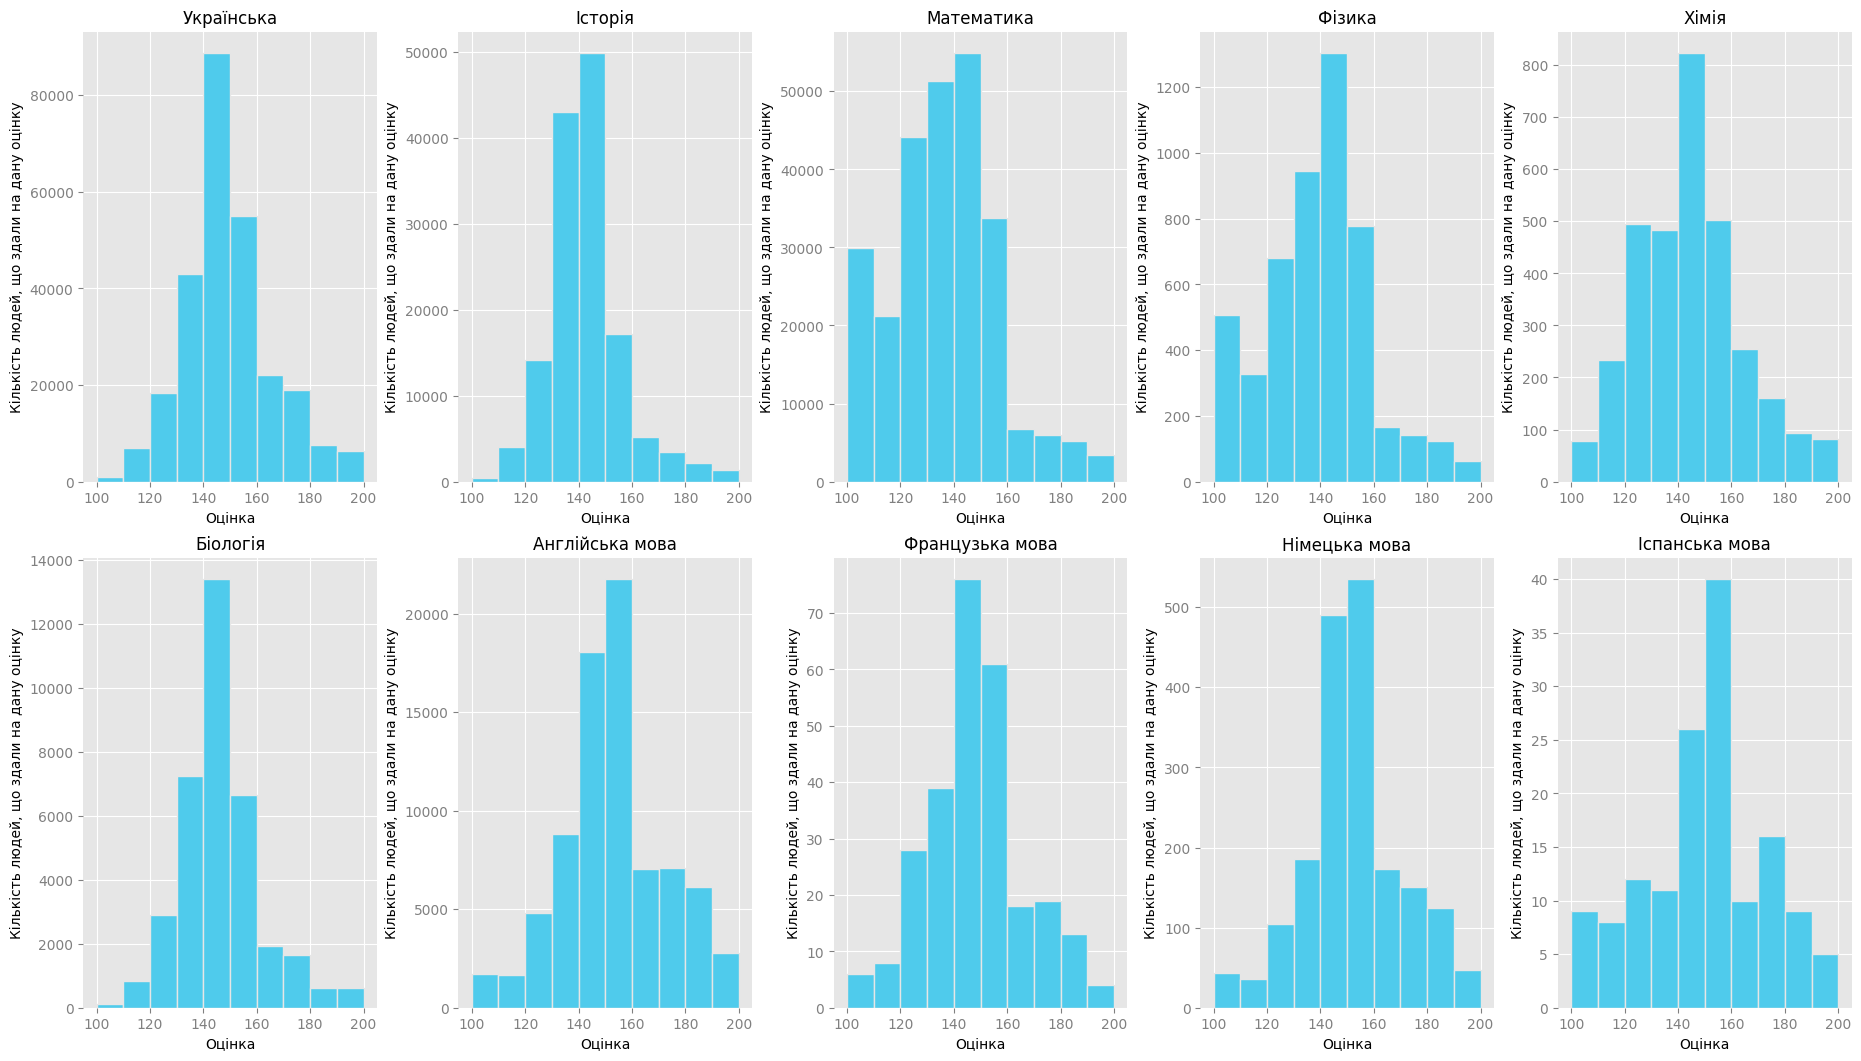

In [32]:
def getHistograms(gradeArrays):
  minGrade = 100
  maxGrade = 200
  numBins = 10
  step = (maxGrade - minGrade) / numBins
  bins = np.arange(minGrade, maxGrade + step, step)
  gradeHists = []

  for i in range(0, len(gradeArrays)):
    hist, _ = np.histogram(gradeArrays[i], bins)
    gradeHists.append(hist)

  return gradeHists, bins

gradeArrays, subjectNames = getGradesAndNamesArrays(data2023, subjectGradesColumnNames)
gradeHists, bins = getHistograms(gradeArrays)

numHists = len(gradeHists)
numPlotRows = 2
numPlotCols = (len(gradeHists) + numPlotRows - 1) // numPlotRows # ceiling column num

fig, axs = plt.subplots(nrows = numPlotRows, ncols = numPlotCols, constrained_layout=True)
fig.set_size_inches(18.5, 10.5)
for i in range(0, numHists):
  r = i // numPlotCols
  c = i % numPlotCols

  ax = axs[r, c]
  setup_histogram_style(ax)
  ax.bar(bins[:-1], gradeHists[i], width=np.diff(bins), align="edge", edgecolor='#E6E6E6', color='#4FCBEC')
  ax.set_title(getUkrainianSubjectName(subjectNames[i]))
  ax.set_ylabel('Кількість людей, що здали на дану оцінку')
  ax.set_xlabel('Оцінка')

Lets see chosen subjects popularity

Text(0, 0.5, 'Кількість людей, які обрали цей предмет')

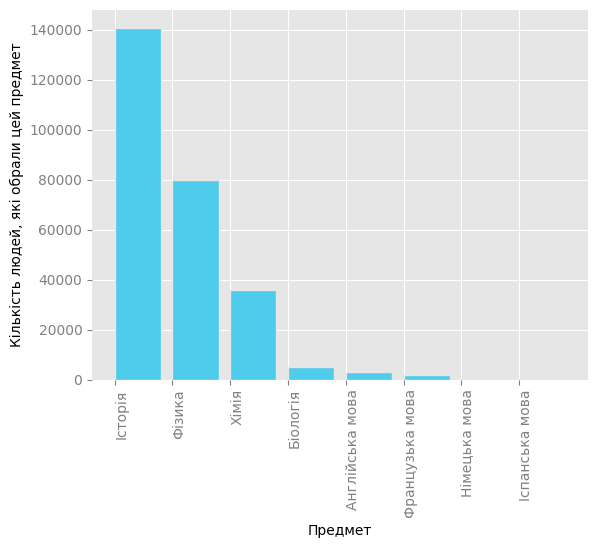

In [46]:
gradeArrays, subjectNames = getGradesAndNamesArrays(data2023, subjectGradesColumnNames)
subjectNames = np.array(getUkrainianSubjectNames(subjectNames))
compulsorySubjects = np.array(getCompulsorySubjects())
chosenSubjectsMask = ~np.in1d(subjectNames, compulsorySubjects)
chosenSubjectsNames = subjectNames[chosenSubjectsMask]
chosenSubjectsGrades = [ gradeArrays[i] for i in range(0, len(gradeArrays)) if  chosenSubjectsMask[i]]
chosenSubjectsNum = chosenSubjectsNames.shape[0]
chosenSubjectsCounts = np.array([ chosenSubjectsGrades[i].shape[0] for i in range(0, chosenSubjectsNum)])
popularitySortedIdx = chosenSubjectsCounts.argsort()[::-1]

print('')

fig, ax = plt.subplots()
setup_histogram_style(ax)
ax.set_xticks(np.arange(chosenSubjectsNum), chosenSubjectsNames, rotation='vertical', ha='left')
ax.bar(chosenSubjectsNames[popularitySortedIdx], chosenSubjectsCounts[popularitySortedIdx], align="edge", edgecolor='#E6E6E6', color='#4FCBEC')
ax.set_xlabel('Предмет')
ax.set_ylabel('Кількість людей, які обрали цей предмет')